---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
df = pd.read_csv('fraud_data.csv')

In [13]:
c = df[df.Class == 1]
356/21693

0.016410823768035772

In [3]:
def answer_one():
    return np.mean(df.Class)
answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    dmc = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    y_pred_dummy = dmc.predict(X_test)
    
    return dmc.score(X_test, y_test), recall_score(y_test, y_pred_dummy)
answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [11]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    svc = SVC(kernel='linear').fit(X_train, y_train) 
    y_pred_svc = svc.predict(X_test)
    return (accuracy_score(y_test, y_pred_svc), recall_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc))


### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svc = SVC(C = 1e9, gamma= 1e-07).fit(X_train, y_train)
    pred = svc.decision_function(X_test) > -220
    
    return confusion_matrix(y_test, pred)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.linear_model import LogisticRegression
# import matplotlib.pyplot as plt

In [54]:
# y_scores_lr = (LogisticRegression().fit(X_train, y_train)
#                .decision_function(X_test))
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_scores_lr = lr.decision_function(X_test)

0.969696969697 0.8
Recall for Precision(0.75) = 0.825


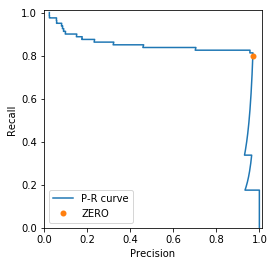

In [77]:
# # y_pred_lr = logr.predict(X_test)
# precision, recall, thresholds = precision_recall_curve(
#                                 y_test, y_scores_lr)
# closest_zero = np.argmin(np.abs(thresholds))
# zero_precision = precision[closest_zero]
# zero_recall = recall[closest_zero]

# print(zero_precision, zero_recall)
# print('Recall for Precision(0.75) = {:0.3f}'.format(recall[np.argmin(np.abs(precision-0.75))]))
# plt.figure()
# # plt.subplot(311)
# plt.xlim(0.0, 1.01)
# plt.ylim(0.0, 1.01)
# plt.plot(precision, recall, label='P-R curve')
# plt.plot(zero_precision, zero_recall, 'o', markersize=3, mew=3, label = 'ZERO')
# plt.xlabel('Precision')
# plt.ylabel('Recall')
# plt.axes().set_aspect('equal')
# plt.legend()
# plt.show()

TPR for FPR(0.16) = 0.938


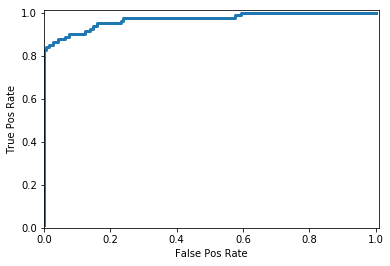

In [74]:
# fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
# auc_lr = auc(fpr_lr, tpr_lr)
# print('TPR for FPR(0.16) = {:0.3f}'
#       .format(tpr_lr[np.argmin(np.abs(fpr_lr-0.16))]))
# plt.figure()
# # plt.subplot(311)
# plt.xlim(0.0, 1.01)
# plt.ylim(0.0, 1.01)
# plt.plot(fpr_lr, tpr_lr, lw=3, 
#          label='LogR ROC(area = {:0.3f})'.format(auc_lr))
# plt.xlabel('False Pos Rate')
# plt.ylabel('True Pos Rate')
# plt.show()

In [7]:
def answer_five():
    return (0.83, 0.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
grid_values = {'C':[0.01, 0.1, 1, 10, 100],
               'penalty': ['l1', 'l2']}
grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring='recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [9]:
def answer_six():    
    return grid_clf.cv_results_['mean_test_score'].reshape(5,2)
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

In [13]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

# GridSearch_Heatmap(answer_six())